# Комп'ютерний практикум №4
- з Обробки Біо-Медичних Даних
- студентки ФБМІ, групи БС-81
- Дворіцької Олени

Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка

In [20]:
import seaborn as sns
import numpy as np
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline



Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.

In [45]:
data={}
data["Normal Distribution_1"]=(np.random.normal(size=20))  
data["Normal Distribution_2"]=(np.random.normal(size=20))  
data["Normal Distribution_3"]=(np.random.normal(size=20))  
data[" Beta distribution."]=(np.random.beta(1,2,size=20))
data["Uniform Distribution1"]=(np.random.uniform(low=1,high=2,size=20))
data["Uniform Distribution2"]=(np.random.uniform(size=20))


print(data)

{'Normal Distribution_1': array([-1.65789176, -0.37144143,  0.08662252, -0.10256572,  1.35342188,
        0.47590799, -1.01501168, -1.77798444, -0.66433531,  1.12046767,
        0.33997493, -0.16951494, -0.0218901 , -0.22503747,  1.31899777,
       -1.57875773, -0.10505728,  0.58742173,  1.57072088,  1.41497312]), 'Normal Distribution_2': array([-0.01555711,  2.21668718, -1.1103425 ,  0.49549625, -1.56774335,
       -0.40052811,  1.22394104,  0.12816242, -0.65859862,  0.20929639,
        1.13085665, -0.34856136,  1.13644875,  0.32809345,  0.18173358,
        0.35809675,  0.25331887,  0.49203965,  0.34821142,  2.03229873]), 'Normal Distribution_3': array([ 0.18439636, -0.62615237, -0.5820908 , -0.54785427,  0.28866162,
       -0.20829933, -1.02841579, -0.01861652, -0.90481562,  0.74248185,
       -1.00821994,  0.33019587, -0.92729881,  0.10186989, -0.96882649,
       -1.97930785, -0.33436078, -0.08803385,  0.34594928, -1.71791634]), ' Beta distribution.': array([0.2752832 , 0.44619981, 

Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних. Детальний опис роботи критерію та приклад його розрахунку (с. 606): https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf

In [46]:
def dem_Sh_Uil(data, num_of_var ,num_of_observations=20):  
    for val in data.values():    
       val.sort()  
    s=[]
    for val in data.values(): 
        s.append(sum([ (i - np.mean(val)) **2 for i in val]))
    print(s)
    ex1=pd.read_excel('Coeficients for the W test for normality.xlsx')[num_of_observations-1]/10000   
    b=[]
    for value in data.values(): 
        first_half=value[:len(value)//2]
        second_half=np.flip(value[len(value)//2:])
        to_append = np.multiply(ex1[:10], (second_half-first_half))
        b.append(to_append) 
    arr_with_s=[]
    for i in range(len(b)):
         arr_with_s.append(((i)**2)/s[i])
    for i in range(len(arr_with_s)):
        if arr_with_s[i]>0.905:
            print('not norm')
        else:
            print('norm')
        

     
dem_Sh_Uil(data,6,20)

[20.087424279182514, 16.45169379431796, 9.660128563719624, 1.4726446481520237, 1.1125572454618577, 1.631134468206158]
norm
norm
norm
not norm
not norm
not norm


Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution. Шаблон таблиці: https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing

In [47]:
table=pd.DataFrame(columns=["Variable","Statistics","Distribution"]) 
table

,Variable,Statistics,Distribution


Занести в стовпчик Variable назви змінних.

In [48]:
table['Variable']=data.keys()
table

,Variable,Statistics,Distribution
0,Normal Distribution_1,NaN,NaN
1,Normal Distribution_2,NaN,NaN
2,Normal Distribution_3,NaN,NaN
3,Beta distribution.,NaN,NaN
4,Uniform Distribution1,NaN,NaN
5,Uniform Distribution2,NaN,NaN


Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [49]:
table["Distribution"]=['normal' if 'Normal Distribution' in x else 'non-normal'
                          for x in table["Variable"]]
table

,Variable,Statistics,Distribution
0,Normal Distribution_1,NaN,normal
1,Normal Distribution_2,NaN,normal
2,Normal Distribution_3,NaN,normal
3,Beta distribution.,NaN,non-normal
4,Uniform Distribution1,NaN,non-normal
5,Uniform Distribution2,NaN,non-normal


Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].

In [51]:
n_df=pd.DataFrame((data), columns=data.keys()) 

for _,val in table.iterrows():
    name = val["Variable"]    
    if val["Distribution"] != "non-normal": 
        val["Statistics"]="{:.3f} [{:.3f}]".format(n_df[name].mean(),n_df[name].std()) 
    else:
        val["Statistics"]="{:.3f} [{:.3f}; {:.3f}]".format(n_df[name].median(),n_df[name].quantile(0.25),n_df[name].quantile(0.75)) 
        
table

,Variable,Statistics,Distribution
0,Normal Distribution_1,0.029 [1.028],normal
1,Normal Distribution_2,0.322 [0.931],normal
2,Normal Distribution_3,-0.447 [0.713],normal
3,Beta distribution.,0.321 [0.084; 0.427],non-normal
4,Uniform Distribution1,1.531 [1.415; 1.660],non-normal
5,Uniform Distribution2,0.437 [0.202; 0.661],non-normal


-Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%]. 
-Зберегти таблицю в пдф форматі

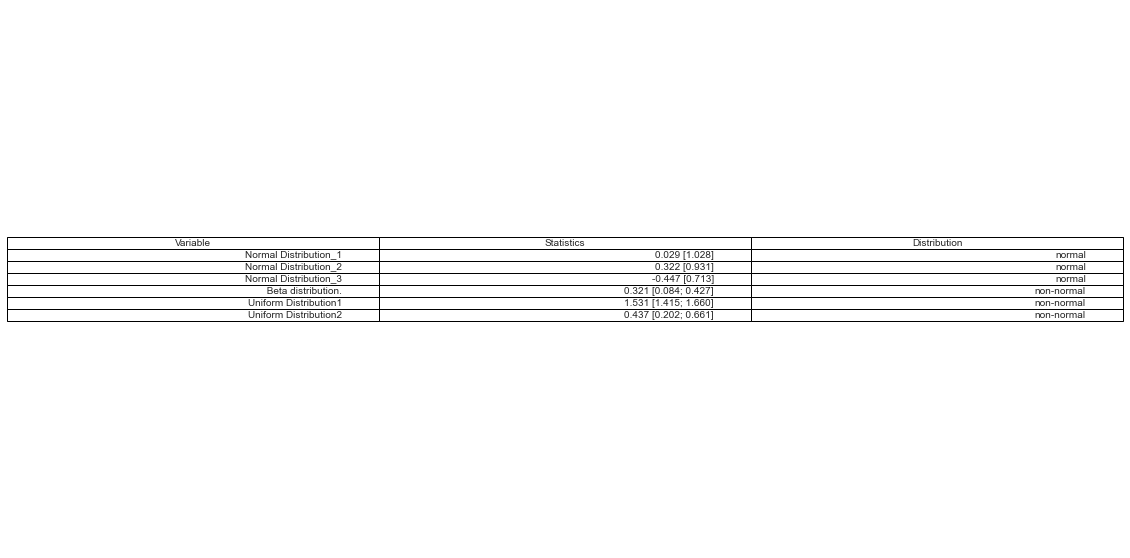

In [53]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


fig, ax = plt.subplots(figsize=(20,10))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=table.values,colLabels=table.columns,loc='center')

pp = PdfPages("myData.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()